<a href="https://colab.research.google.com/github/fmezacr/DataScienceTEC/blob/master/Redes_Neuronales_ANN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---


## **Diseño y Operación de Redes Neuronales con Keras**
### Autor: ***Felipe Meza-Obando***

### **1. Introducción**
Exploraremos el proceso completo para diseñar, entrenar y validar una red neuronal utilizando el conjunto de datos MNIST. El objetivo es comprender cómo funcionan las arquitecturas básicas de redes neuronales, la importancia de los hiperparámetros y cómo interpretar los resultados de entrenamiento.

Empezaremos con un caso de clasificación y cerraremos con uno de regresión.

---

### **2. Carga de Librerías y Conjunto de Datos**

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from IPython.display import Image
import time
plt.style.use("seaborn-v0_8-paper")



- **`mnist`**: Base de datos de imágenes de dígitos escritos a mano.  
- **`Sequential`**: Permite crear una red capa por capa.  
- **`Dense`**: Capa completamente conectada.  
- **`Dropout`**: Técnica para reducir el overfitting.  
- **`to_categorical`**: Convierte las etiquetas en vectores categóricos para clasificación multiclase.

---

### **3. Cargar y Visualizar los Datos**

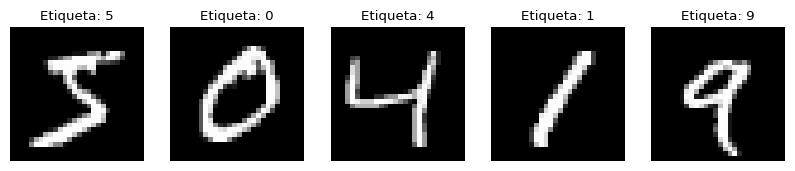

In [ ]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualizar algunas imágenes
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
plt.show()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)


- El dataset MNIST contiene **60,000 imágenes** para entrenamiento y **10,000 imágenes** para prueba.  
- Cada imagen es de tamaño **28x28 píxeles** y representa un dígito entre 0 y 9.

---



### **4. Preprocesamiento de Datos**

In [ ]:
# Normalización: Escalar los valores de píxeles entre 0 y 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

  
- **Normalización:** Mejora la convergencia del modelo.  
- **Categorización:** Cada etiqueta se convierte en un vector binario para la clasificación.

---



### **5. Definir la Arquitectura de la Red**

In [ ]:
model = Sequential([
    tf.keras.Input(shape=(28, 28)),  # Definimos la entrada explícitamente
    Flatten(),                       # Aplanamiento
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Resumen del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


- **Entrada:** Vector de 784 dimensiones (imágenes aplanadas).  
- **Primera capa oculta:** 128 neuronas, activación ReLU, con **Dropout** del 20%.  
- **Segunda capa oculta:** 64 neuronas, activación ReLU.  
- **Capa de salida:** 10 neuronas (una por clase), activación **softmax** para clasificación multiclase.



In [ ]:
# Mostrar la imagen usando IPython
Image(url='https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/recap-propagation.png', width=600)


---

### **6. Compilar el Modelo**

In [ ]:
model.compile(optimizer='adam',                #El valor predeterminado del learning rate en Adam es 0.001.
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- **`adam`**: Optimizador que ajusta el learning rate automáticamente.  
- **`categorical_crossentropy`**: Función de pérdida para clasificación multiclase.  
- **`accuracy`**: Métrica utilizada para evaluar el rendimiento del modelo.

---

### **7. Entrenamiento del Modelo**

Usamos los datos de prueba para evaluar la precisión final del modelo.

In [ ]:
# Iniciar el timer
start_time = time.time()

# Entrenar el modelo con los datos aplanados
history = model.fit(X_train, y_train,
                    validation_split=0.2, # De los datos de training, se toma el 20% para validar.
                    epochs=10,
                    batch_size=32)

# Calcular el tiempo total de entrenamiento
end_time = time.time()
elapsed_time = end_time - start_time

# Imprimir el tiempo total
minutes, seconds = divmod(elapsed_time, 60)
print(f"Tiempo total de entrenamiento: {int(minutes):02d}:{int(seconds):02d} (mm:ss)")



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8371 - loss: 0.5443 - val_accuracy: 0.9556 - val_loss: 0.1479
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9541 - loss: 0.1523 - val_accuracy: 0.9689 - val_loss: 0.1043
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9651 - loss: 0.1131 - val_accuracy: 0.9714 - val_loss: 0.0990
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9718 - loss: 0.0918 - val_accuracy: 0.9710 - val_loss: 0.1008
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9734 - loss: 0.0827 - val_accuracy: 0.9747 - val_loss: 0.0872
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9749 - loss: 0.0746 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9800 - loss: 0.0632 - val_accuracy: 0.9764 - val_loss: 0.0866
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9814 - loss: 0.0561 -

- **`epoch`**: Una pasada completa por el conjunto de entrenamiento.  
- **`batch_size`**: Número de muestras procesadas antes de actualizar los pesos.  
- **`validation_split`**: Porcentaje de datos reservados para validación durante el entrenamiento.

---



### **8. Visualización de las Curvas de Entrenamiento**

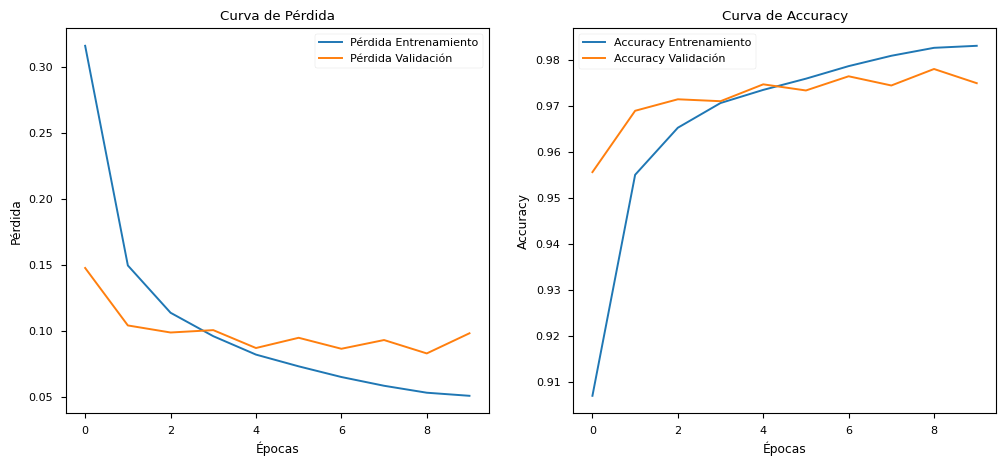

In [ ]:
# Graficar las curvas de pérdida y accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Curva de pérdida
ax[0].plot(history.history['loss'], label='Pérdida Entrenamiento')
ax[0].plot(history.history['val_loss'], label='Pérdida Validación')
ax[0].set_title('Curva de Pérdida')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Pérdida')
ax[0].legend()

# Curva de accuracy
ax[1].plot(history.history['accuracy'], label='Accuracy Entrenamiento')
ax[1].plot(history.history['val_accuracy'], label='Accuracy Validación')
ax[1].set_title('Curva de Accuracy')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()


### **9. Evaluación del Modelo**

In [ ]:

# Evaluar el modelo con el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss * 100:.2f}%")
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1055
Test Loss: 8.90%
Precisión en el conjunto de prueba: 97.68%


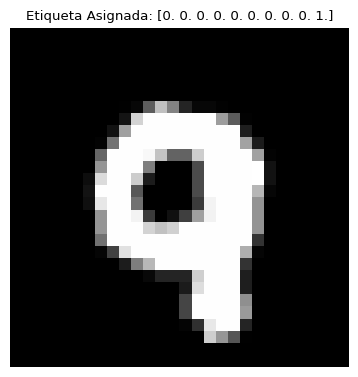

In [ ]:
# Seleccionar un índice aleatorio para visualizar un dígito
index = np.random.randint(0, len(X_test))

# Visualizar la imagen y su etiqueta correspondiente
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta Asignada: {y_test[index]}')
plt.axis('off')  # Eliminar ejes para una mejor visualización
plt.show()
